<a href="https://colab.research.google.com/github/Gnanadeepa05/INFO-5731/blob/main/Paladugu_Gnana_Deepa__Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import pandas as pd
from collections import defaultdict
import re
#generating n grams
def get_ngrams(text, n):
    words = text.split()
    return [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
#freq counter
def count_ngrams(texts, n):
    ngram_counts = defaultdict(int)
    for text in texts:
        ngrams = get_ngrams(text, n)
        for ngram in ngrams:
            ngram_counts[ngram] += 1
    return dict(ngram_counts)

def calculate_bigram_probabilities(texts):  # calculating bigram probabilities
    bigram_counts = count_ngrams(texts, 2)
    unigram_counts = count_ngrams(texts, 1)

    bigram_probs = {}
    for bigram, count in bigram_counts.items():
        first_word = bigram[0]
        prob = count / unigram_counts[(first_word,)]
        bigram_probs[bigram] = prob

    return bigram_probs

def extract_noun_phrases(text):  # extracting noun phrases
    words = text.split()
    noun_phrases = []
    determiners = {'the', 'a', 'an', 'this', 'that', 'these', 'those', 'my', 'your', 'his', 'her', 'their','of','for','much','to','in','still','my'}
    common_adjectives = {'good', 'great', 'bad', 'nice', 'beautiful', 'amazing', 'awesome', 'terrible', 'brilliant', 'dark'}
    for i in range(len(words)-1):
        if words[i].lower() in determiners and i < len(words)-2:
            phrase = f"{words[i+1]} {words[i+2]}"
            noun_phrases.append(phrase.lower())

    for i in range(len(words)-1):
        if words[i].lower() in common_adjectives:
            phrase = f"{words[i]} {words[i+1]}"
            noun_phrases.append(phrase.lower())

    for i in range(len(words)-1):
        # Skip if either word is very short or is a common stop word
        if (len(words[i]) > 2 and len(words[i+1]) > 2 and
            words[i].lower() not in determiners and
            words[i+1].lower() not in determiners):
            phrase = f"{words[i]} {words[i+1]}"
            noun_phrases.append(phrase.lower())

    return list(set(noun_phrases))

def calculate_relative_probabilities(texts): # calculating relative probabilities
    all_noun_phrases = defaultdict(int)
    text_noun_phrases = []
    for text in texts:  #getting noun phrases for text
        phrases = extract_noun_phrases(text)
        text_noun_phrases.append(phrases)
        for phrase in phrases:
            all_noun_phrases[phrase] += 1

    if not all_noun_phrases:
        print("Warning: No noun phrases found in the texts")
        return [], []

    max_freq = max(all_noun_phrases.values())

    relative_probs = []
    for phrases in text_noun_phrases:
        text_probs = {}
        for phrase in all_noun_phrases.keys():
            if phrase in phrases:
                text_probs[phrase] = all_noun_phrases[phrase] / max_freq
            else:
                text_probs[phrase] = 0
        relative_probs.append(text_probs)

    return relative_probs, list(all_noun_phrases.keys())

def main():
    df = pd.read_csv('cleaned_reviews.csv')
    texts = df['cleaned_review'].tolist()

    print("trigram frequencies")  #trigram
    trigram_counts = count_ngrams(texts, 3)
    for trigram, count in sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{' '.join(trigram)}: {count}")

    # bigram probabilities
    print("\nbigram probabilities")
    bigram_probs = calculate_bigram_probabilities(texts)
    for bigram, prob in sorted(bigram_probs.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{' '.join(bigram)}: {prob:.3f}")

    # calculating relative noun phrase probabilities and the create table
    relative_probs, noun_phrases = calculate_relative_probabilities(texts)

    if noun_phrases:
        prob_df = pd.DataFrame(relative_probs, columns=noun_phrases)
        prob_df.index = [f"Review_{i+1}" for i in range(len(relative_probs))]
        # Saving csv file
        prob_df.to_csv('noun_phrase_probabilities.csv')
        print("\n Noun phrase probability table is saved to a csv file")
        print(prob_df.iloc[:5, :5])
    else:
        print("\n noun phrases not found in the text")

if __name__ == "__main__":
    main()

trigram frequencies
robert downey jr: 360
downey jr emili: 160
jr emili blunt: 160
j robert oppenheim: 160
blunt florenc pugh: 120
brain fulli switch: 80
scene florenc pugh: 80
keep thing move: 80
downey jr also: 80
dark knight trilog: 80

bigram probabilities
wit brain: 1.000
brain fulli: 1.000
nonattent viewer: 1.000
fire dialogu: 1.000
clue guid: 1.000
grip quit: 1.000
attack chase: 1.000
chase atom: 1.000
germani could: 1.000
consistenli brilliant: 1.000

 Noun phrase probability table is saved to a csv file
          pace jump  get grip  fact whole  particularli brilliant  \
Review_1   0.090909  0.090909    0.090909                0.090909   
Review_2   0.000000  0.000000    0.000000                0.000000   
Review_3   0.000000  0.000000    0.000000                0.000000   
Review_4   0.000000  0.000000    0.000000                0.000000   
Review_5   0.000000  0.000000    0.000000                0.000000   

          fire dialogu  
Review_1      0.090909  
Review_2      0.0

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import pandas as pd
import math
from collections import Counter, defaultdict
import re

class TFIDFSearchEngine:
    def __init__(self):
        self.documents = []
        self.vocab = set()
        self.doc_term_matrix = []
        self.idf_scores = {}
        self.tfidf_matrix = []

    def preprocess_text(self, text):
        text = text.lower() #lower case
        text = re.sub(r'[^a-zA-Z\s]', '', text) # removing special characters and numbers
        # split the words
        words = [word for word in text.split() if word]
        return words

    def compute_tf(self, text): # term frequencies
        words = self.preprocess_text(text)
        word_count = Counter(words)
        total_words = len(words)
        return {word: count/total_words for word, count in word_count.items()}

    def compute_idf(self):
        num_docs = len(self.documents)
        term_doc_count = defaultdict(int)
        for doc in self.documents: #count documents containg each term
            words = set(self.preprocess_text(doc))
            for word in words:
                term_doc_count[word] += 1

        #idf scores
        self.idf_scores = {term: math.log(num_docs / (count + 1)) + 1
                          for term, count in term_doc_count.items()}
        return self.idf_scores

    def build_tfidf_matrix(self, texts):
        self.documents = texts
        self.doc_term_matrix = []
        for doc in self.documents:
            words = self.preprocess_text(doc)
            self.vocab.update(words)
        self.compute_idf()

        # TF-IDF matrix
        for doc in self.documents:
            tf_scores = self.compute_tf(doc)
            tfidf_scores = {}
            for term in self.vocab:
                tf = tf_scores.get(term, 0)
                idf = self.idf_scores.get(term, 0)
                tfidf_scores[term] = tf * idf
            self.tfidf_matrix.append(tfidf_scores)

        return self.tfidf_matrix

    def compute_query_tfidf(self, query):
        query_tf = self.compute_tf(query)
        query_tfidf = {}

        for term in self.vocab:
            tf = query_tf.get(term, 0)
            idf = self.idf_scores.get(term, 0)
            query_tfidf[term] = tf * idf

        return query_tfidf

    def cosine_similarity(self, vec1, vec2):
        # dot product
        dot_product = sum(vec1.get(term, 0) * vec2.get(term, 0) for term in self.vocab)
        # calculating magnitude
        mag1 = math.sqrt(sum(val**2 for val in vec1.values()))
        mag2 = math.sqrt(sum(val**2 for val in vec2.values()))
        if mag1 == 0 or mag2 == 0:
            return 0

        return dot_product / (mag1 * mag2)

    def rank_documents(self, query):
        query_tfidf = self.compute_query_tfidf(query)

        # Computing similarities
        similarities = []
        for idx, doc_tfidf in enumerate(self.tfidf_matrix):
            sim = self.cosine_similarity(query_tfidf, doc_tfidf)
            similarities.append((idx, sim))

        return sorted(similarities, key=lambda x: x[1], reverse=True)

def main():
    df = pd.read_csv('cleaned_reviews.csv')
    texts = df['cleaned_review'].tolist()

    #search engine
    search_engine = TFIDFSearchEngine()
    print("Building TF-IDF matrix...")
    tfidf_matrix = search_engine.build_tfidf_matrix(texts)
    query = "An Outstanding movie with a haunting performance and best character development"
    print("\nProcessing query:", query)
    ranked_docs = search_engine.rank_documents(query)
    print("\ntop 10 similar documents:")
    print("Rank\tScore\tDocument Preview")
    print("-" * 60)

    for rank, (doc_idx, score) in enumerate(ranked_docs[:10], 1):
        preview = texts[doc_idx][:50] + "..."
        print(f"{rank}\t{score:.4f}\t{preview}")

    results_df = pd.DataFrame(ranked_docs, columns=['Document_Index', 'Similarity_Score'])
    results_df['Document_Text'] = results_df['Document_Index'].apply(lambda x: texts[x])
    results_df.to_csv('search_results.csv', index=False)
    print("\ndetailed results saved to 'search_results.csv'")
    print("\nTF-IDF Statistics:")
    print(f"No of documents: {len(texts)}")
    print(f"Vocabulary size: {len(search_engine.vocab)}")
    print("\nExample TF-IDF weights for first document:")
    sorted_terms = sorted(tfidf_matrix[0].items(), key=lambda x: x[1], reverse=True)[:10]
    for term, weight in sorted_terms:
        print(f"{term}: {weight:.4f}")

if __name__ == "__main__":
    main()

Building TF-IDF matrix...

Processing query: An Outstanding movie with a haunting performance and best character development

top 10 similar documents:
Rank	Score	Document Preview
------------------------------------------------------------
1	0.0981	movi wow dont think ever felt like watch movi like...
2	0.0981	movi wow dont think ever felt like watch movi like...
3	0.0981	movi wow dont think ever felt like watch movi like...
4	0.0981	movi wow dont think ever felt like watch movi like...
5	0.0981	movi wow dont think ever felt like watch movi like...
6	0.0981	movi wow dont think ever felt like watch movi like...
7	0.0981	movi wow dont think ever felt like watch movi like...
8	0.0981	movi wow dont think ever felt like watch movi like...
9	0.0981	movi wow dont think ever felt like watch movi like...
10	0.0981	movi wow dont think ever felt like watch movi like...

detailed results saved to 'search_results.csv'

TF-IDF Statistics:
No of documents: 1000
Vocabulary size: 1571

Example TF-IDF 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

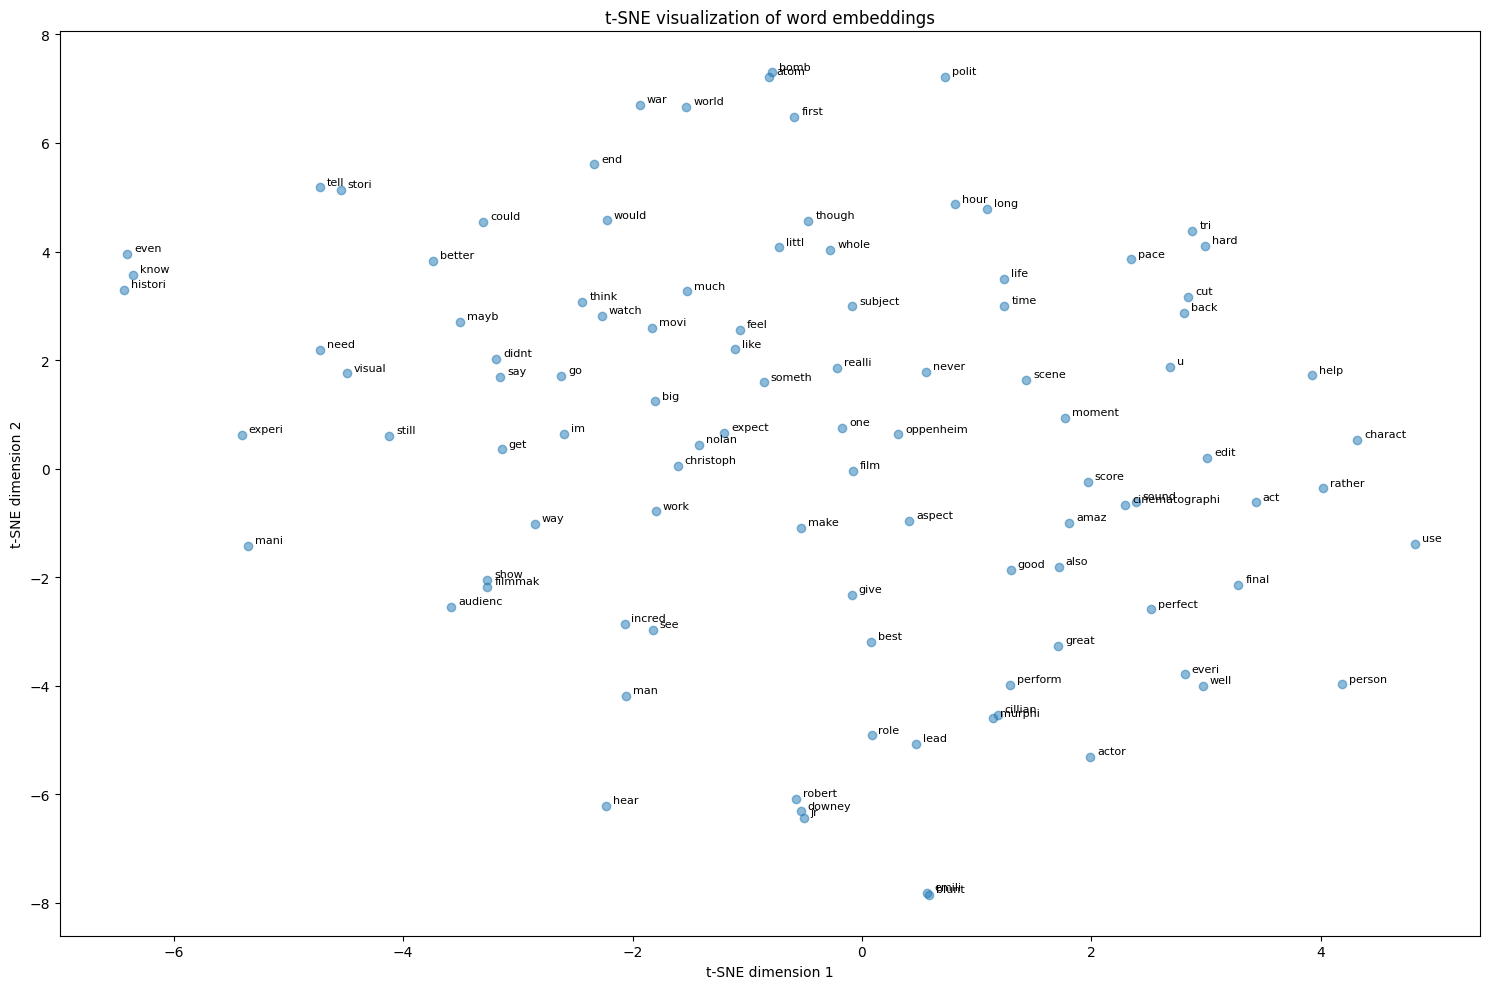


Words most similar to 'good':
  yeah: 0.8259
  idk: 0.8182
  boatload: 0.8018
  directori: 0.7640
  warrant: 0.7523

Words most similar to 'bad':
  patienc: 0.8669
  mean: 0.8425
  littl: 0.8035
  sink: 0.7623
  bit: 0.7576

Words most similar to 'great':
  timesth: 0.8643
  therealso: 0.8192
  soundtracksal: 0.7852
  larg: 0.7820
  jame: 0.7731

Word 'experience' not in vocabulary

Word 'thrilling' not in vocabulary

Words most similar to 'biopic':
  treat: 0.8135
  stunnedth: 0.8090
  tranquil: 0.8086
  usual: 0.8001
  fragment: 0.7871

Words most similar to 'hype':
  surround: 0.9094
  align: 0.8128
  fell: 0.7943
  nolanesqu: 0.6909
  fail: 0.6898

Words most similar to 'bomb':
  atom: 0.8820
  boy: 0.8586
  liken: 0.8384
  drop: 0.8358
  nitti: 0.8228


In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

def create_word_embedding_model(data: pd.DataFrame,
                              text_column: str = 'cleaned_review',
                              vector_size: int = 300,
                              window: int = 5,
                              min_count: int = 5,
                              workers: int = 4) -> Word2Vec:
    #text to list of list of words
    sentences = [review.split() for review in data[text_column] if isinstance(review, str)]

    #word2Vec model
    model = Word2Vec(sentences=sentences,
                    vector_size=vector_size,
                    window=window,
                    min_count=min_count,
                    workers=workers)

    return model
def visualize_embeddings(model: Word2Vec,
                        n_words: int = 100,
                        figsize: tuple = (15, 10)) -> None:
    # getting most common words
    words = [word for word, vocab in model.wv.key_to_index.items()][:n_words]
    word_vectors = np.array([model.wv[word] for word in words])  # Convert to numpy array

    # perform t-sne
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, n_words-1))
    embeddings_2d = tsne.fit_transform(word_vectors)
    plt.figure(figsize=figsize)
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
    # adding word labels
    for i, word in enumerate(words):
        plt.annotate(word,
                    xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    fontsize=8)

    plt.title('t-SNE visualization of word embeddings')
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.tight_layout()
    plt.show()

def analyze_similar_words(model: Word2Vec,
                         words: List[str],
                         topn: int = 5) -> None:
    for word in words:
        try:
            similar_words = model.wv.most_similar(word, topn=topn)
            print(f"\nWords most similar to '{word}':")
            for similar_word, score in similar_words:
                print(f"  {similar_word}: {score:.4f}")
        except KeyError:
            print(f"\nWord '{word}' not in vocabulary")

if __name__ == "__main__":
    df = pd.read_csv('cleaned_reviews.csv')

    # training model
    model = create_word_embedding_model(df)
    visualize_embeddings(model)
    example_words = ['good', 'bad','great','experience','thrilling','biopic','hype','bomb']
    analyze_similar_words(model, example_words)
    model.save("word2vec_model.model")

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/Gnanadeepa05/review



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
i felt dimensionality reduction a bit hard and i enjoyed doing N-gram analysis and i think the provided time is sufficient.